In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [339]:
from sklearn.datasets import fetch_california_housing

cal_house = fetch_california_housing()

In [340]:
cal_house
# The loaded dataset is a loaded as Dictionary

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [341]:
print(cal_house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [342]:
df= cal_house.data

In [343]:
df

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8))

In [344]:
target = cal_house.target
target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [345]:
feature_names = cal_house.feature_names
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
class PolynomialRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.coefs = None

    def _poly_features(self, X):
        n_samples = len(X)
        features = [[1.0] * n_samples]
        for d in range(1, self.degree + 1):
            features.append([X[i] ** d for i in range(n_samples)])
        X_poly = np.zeros((n_samples, len(features)))
        for j in range(len(features)):
            for i in range(n_samples):
                X_poly[i][j] = features[j][i]
        return X_poly

    def _inverse_matrix(self, mat):
        size = len(mat)
        aug = np.zeros((size, 2 * size))
        for i in range(size):
            for j in range(size):
                aug[i][j] = mat[i][j]
            aug[i][i + size] = 1.0
        for i in range(size):
            diag = aug[i][i]
            for k in range(2 * size):
                aug[i][k] /= diag
            for j in range(size):
                if j != i:
                    ratio = aug[j][i]
                    for k in range(2 * size):
                        aug[j][k] -= ratio * aug[i][k]
        inv = np.zeros((size, size))
        for i in range(size):
            for j in range(size):
                inv[i][j] = aug[i][j + size]
        return inv

    def fit(self, X, y):
        X_poly = self._poly_features(X)
        XT_X = np.zeros((X_poly.shape[1], X_poly.shape[1]))
        for i in range(X_poly.shape[1]):
            for j in range(X_poly.shape[1]):
                s = 0
                for k in range(X_poly.shape[0]):
                    s += X_poly[k][i] * X_poly[k][j]
                XT_X[i][j] = s
        XT_y = np.zeros((X_poly.shape[1], 1))
        for i in range(X_poly.shape[1]):
            s = 0
            for k in range(X_poly.shape[0]):
                s += X_poly[k][i] * y[k]
            XT_y[i][0] = s
        XT_X_inv = self._inverse_matrix(XT_X)
        self.coefs = np.zeros((X_poly.shape[1], 1))
        for i in range(X_poly.shape[1]):
            s = 0
            for j in range(X_poly.shape[1]):
                s += XT_X_inv[i][j] * XT_y[j][0]
            self.coefs[i][0] = s

    def predict(self, X):
        X_poly = self._poly_features(X)
        y_pred = []
        for i in range(X_poly.shape[0]):
            pred_val = 0
            for j in range(X_poly.shape[1]):
                pred_val += X_poly[i][j] * self.coefs[j][0]
            y_pred.append(pred_val)
        return y_pred

def mean_squared_error(y_true, y_pred):
    error = 0
    for i in range(len(y_true)):
        diff = y_true[i] - y_pred[i]
        error += diff * diff
    return error / len(y_true)


In [348]:
def split_data(X, y,test_size= 0.2, random_state=0):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))  # shuffle the indices

    # Compute split sizes
    n = len(X)
    val_size= 0.2
    train_size= (1- test_size - val_size)
    val_end = int((1- val_size) * n)
    train_end = int(train_size * n)

    # Split the data
    X_train = X[indices[:train_end]]
    y_train = y[indices[:train_end]]

    X_val = X[indices[train_end:val_end]]
    y_val = y[indices[train_end:val_end]]

    X_test = X[indices[val_end:]]
    y_test = y[indices[val_end:]]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [349]:
X= df[:, 0]

In [350]:
X

array([8.3252, 8.3014, 7.2574, ..., 1.7   , 1.8672, 2.3886],
      shape=(20640,))

In [351]:
y= target

In [352]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

In [353]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X,y)

In [354]:
model = PolynomialRegression(degree= 3)

In [355]:
model.fit(X_train, y_train)

In [356]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [357]:
print("Learned Coefficients:", model.coefs.flatten())
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"Validation MSE: {mean_squared_error(y_val, y_val_pred):.4f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.4f}")

Learned Coefficients: [ 0.76052003  0.15482477  0.05857322 -0.00342762]
Train MSE: 0.6963
Validation MSE: 0.6812
Test MSE: 0.6510


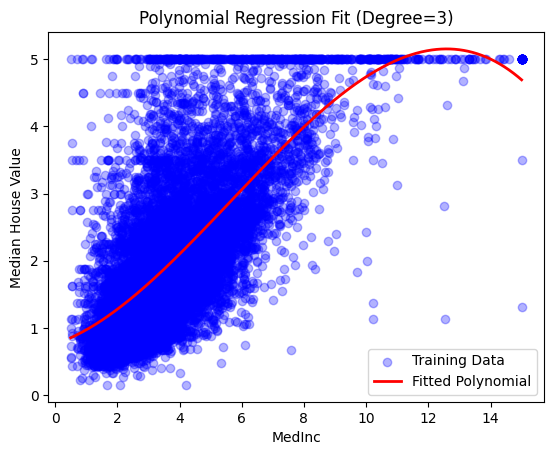

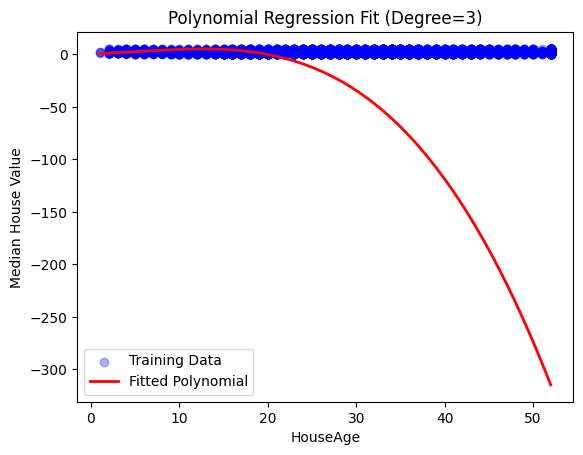

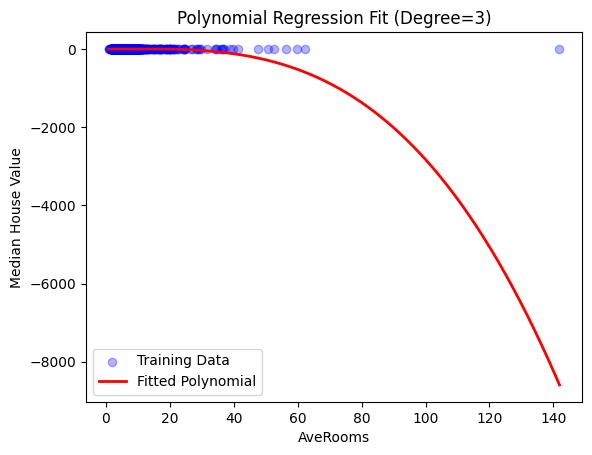

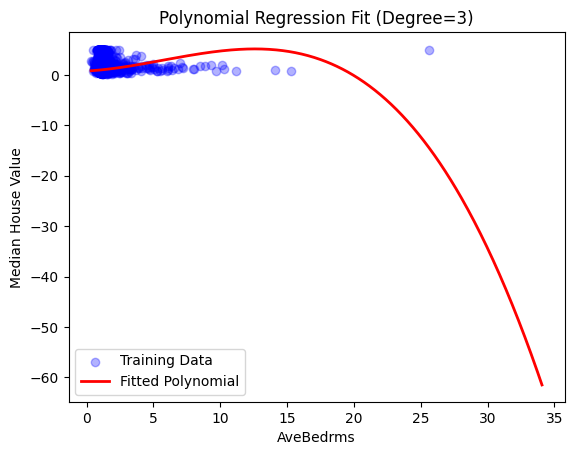

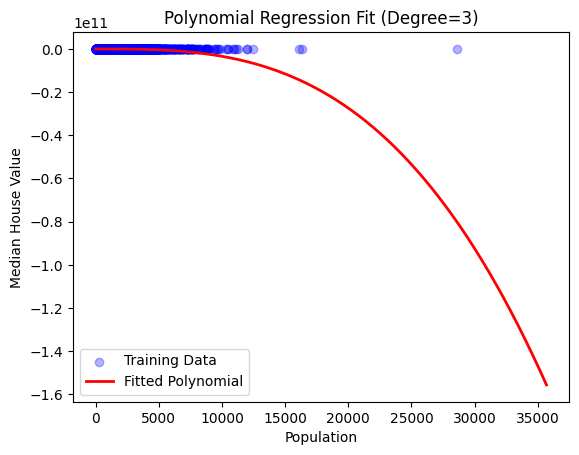

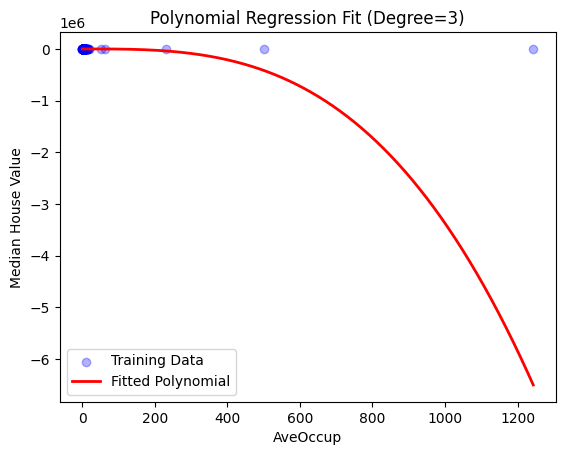

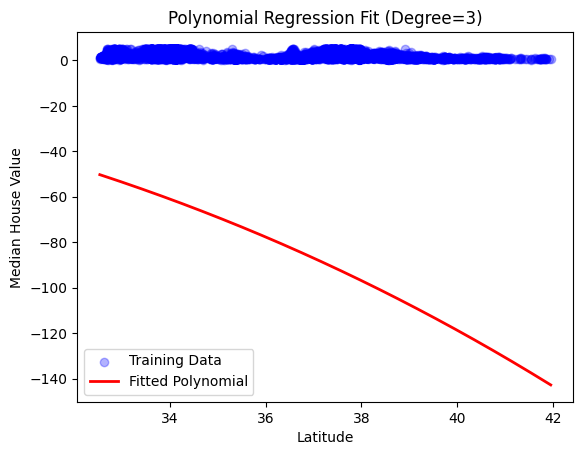

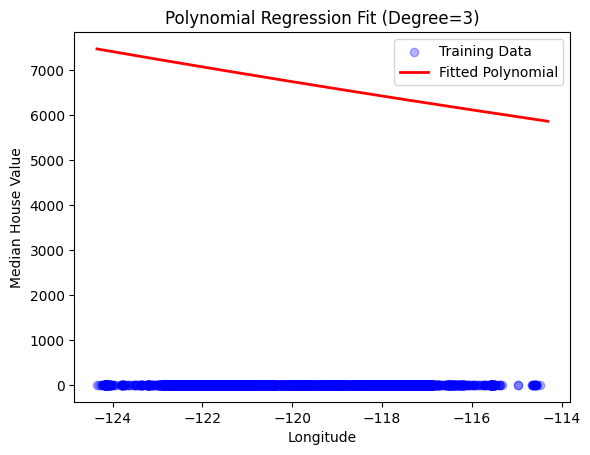

In [364]:
dic= dict()
i= 0
for feature in feature_names:
    dic[i]= feature
    i+=1
for feature_index in dic.keys():
    X= df[:, feature_index]
    X_train, y_train, X_val, y_val, X_test, y_test = split_data(X,y)
    plt.scatter(X_train, y_train, color='blue', alpha=0.3, label="Training Data")
    X_curve = np.linspace(min(X), max(X), 500)
    y_curve = model.predict(X_curve)
    plt.plot(X_curve, y_curve, color='red', linewidth=2, label="Fitted Polynomial")
    plt.xlabel(dic[feature_index])
    plt.ylabel("Median House Value")
    plt.legend()
    plt.title("Polynomial Regression Fit (Degree=3)")
    plt.show()